In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
df = pd.read_csv('C:/Users/USER/Desktop/PaperWork_Dataset/sampled/sampled_dataset.csv')
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,32968,6,16/02/2018 01:45:53,4839591,5,3,935.0,285.0,935.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,3389,6,14/02/2018 09:27:43,2189275,8,7,1144.0,1581.0,677.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,37346,6,16/02/2018 01:45:27,5130062,5,3,935.0,326.0,935.0,0.0,...,32,0.0,0.0,0.0,0.0,5072587.0,0.0,5072587.0,5072587.0,Benign
3,54504,6,16/02/2018 01:46:23,4104040,5,3,935.0,358.0,935.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,80,6,02/03/2018 02:29:12,142,2,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,80,6,20/02/2018 10:44:44,16313323,2,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,16300000.0,0.0,16300000.0,16300000.0,DDoS attacks-LOIC-HTTP
69996,80,6,20/02/2018 10:25:03,893450,3,4,20.0,964.0,20.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS attacks-LOIC-HTTP
69997,80,6,20/02/2018 11:05:38,879080,3,4,20.0,964.0,20.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS attacks-LOIC-HTTP
69998,80,6,20/02/2018 10:43:54,31657789,2,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,31700000.0,0.0,31700000.0,31700000.0,DDoS attacks-LOIC-HTTP


In [3]:
df['Label'].value_counts()

Label
Benign                    5000
Infilteration             5000
DDOS attack-LOIC-UDP      5000
DDOS attack-HOIC          5000
FTP-BruteForce            5000
SSH-Bruteforce            5000
Brute Force -Web          5000
Brute Force -XSS          5000
SQL Injection             5000
DoS attacks-GoldenEye     5000
DoS attacks-Slowloris     5000
DoS attacks-Hulk          5000
Bot                       5000
DDoS attacks-LOIC-HTTP    5000
Name: count, dtype: int64

In [5]:
df = df.drop('Timestamp', axis=1)
df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,32968,6,4839591,5,3,935.0,285.0,935.0,0.0,187.000000,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,3389,6,2189275,8,7,1144.0,1581.0,677.0,0.0,143.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,37346,6,5130062,5,3,935.0,326.0,935.0,0.0,187.000000,...,32,0.0,0.0,0.0,0.0,5072587.0,0.0,5072587.0,5072587.0,Benign
3,54504,6,4104040,5,3,935.0,358.0,935.0,0.0,187.000000,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,80,6,142,2,0,0.0,0.0,0.0,0.0,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,80,6,16313323,2,0,0.0,0.0,0.0,0.0,0.000000,...,20,0.0,0.0,0.0,0.0,16300000.0,0.0,16300000.0,16300000.0,DDoS attacks-LOIC-HTTP
69996,80,6,893450,3,4,20.0,964.0,20.0,0.0,6.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS attacks-LOIC-HTTP
69997,80,6,879080,3,4,20.0,964.0,20.0,0.0,6.666667,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS attacks-LOIC-HTTP
69998,80,6,31657789,2,0,0.0,0.0,0.0,0.0,0.000000,...,20,0.0,0.0,0.0,0.0,31700000.0,0.0,31700000.0,31700000.0,DDoS attacks-LOIC-HTTP


In [7]:
label_encode = LabelEncoder()
df['Label'] = label_encode.fit_transform(df['Label'].values.ravel())
df['Label'].value_counts()

Label
0     5000
11    5000
5     5000
4     5000
10    5000
13    5000
2     5000
3     5000
12    5000
7     5000
9     5000
8     5000
1     5000
6     5000
Name: count, dtype: int64

In [8]:
X=df.drop('Label',axis=1)
X.head()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,32968,6,4839591,5,3,935.0,285.0,935.0,0.0,187.0,...,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3389,6,2189275,8,7,1144.0,1581.0,677.0,0.0,143.0,...,5,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,37346,6,5130062,5,3,935.0,326.0,935.0,0.0,187.0,...,1,32,0.0,0.0,0.0,0.0,5072587.0,0.0,5072587.0,5072587.0
3,54504,6,4104040,5,3,935.0,358.0,935.0,0.0,187.0,...,1,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80,6,142,2,0,0.0,0.0,0.0,0.0,0.0,...,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
y=df['Label']
y.value_counts()

Label
0     5000
11    5000
5     5000
4     5000
10    5000
13    5000
2     5000
3     5000
12    5000
7     5000
9     5000
8     5000
1     5000
6     5000
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.1, shuffle = True, random_state = 21)
X_train = X_train.values
X_test = X_test.values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63000, 78), (7000, 78), (63000,), (7000,))

In [11]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(63000, 78)
(7000, 78)
(63000, 14)
(7000, 14)


In [13]:
#데이터셋을 3차원으로 변환

X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((63000, 78, 1), (7000, 78, 1))

In [14]:
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout

In [17]:
input_layer = Input(shape=(78, 1))

conv1 = Conv1D(filters=64, kernel_size=6, padding = 'same', activation='relu')(input_layer)
flat = Flatten()(conv1)
dens = Dense(64, activation = "relu")(flat)
outputs = Dense(14, activation = "softmax")(dens)

model = keras.Model(input_layer, outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 78, 1)]           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 78, 64)            448       
                                                                 
 flatten_1 (Flatten)         (None, 4992)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                319552    
                                                                 
 dense_3 (Dense)             (None, 14)                910       
                                                                 
Total params: 320910 (1.22 MB)
Trainable params: 320910 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
train_epochs = 10
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, batch_size = 32, validation_data = (X_test, y_test_onehot))

Epoch 1/10
1969/1969 [==============================] - 12s 6ms/step - loss: 19288.4375 - accuracy: 0.3023 - val_loss: 9.9048 - val_accuracy: 0.1970
Epoch 2/10
1969/1969 [==============================] - 11s 5ms/step - loss: 6.6640 - accuracy: 0.1623 - val_loss: 2.8923 - val_accuracy: 0.2139
Epoch 3/10
1969/1969 [==============================] - 10s 5ms/step - loss: 3.9429 - accuracy: 0.1003 - val_loss: 2.6846 - val_accuracy: 0.0714
Epoch 4/10
1969/1969 [==============================] - 11s 5ms/step - loss: 2.6523 - accuracy: 0.0704 - val_loss: 2.6607 - val_accuracy: 0.0704
Epoch 5/10
1969/1969 [==============================] - 11s 5ms/step - loss: 2.6751 - accuracy: 0.0693 - val_loss: 2.7037 - val_accuracy: 0.0706
Epoch 6/10
1969/1969 [==============================] - 11s 5ms/step - loss: 2.6388 - accuracy: 0.0699 - val_loss: 2.7035 - val_accuracy: 0.0691
Epoch 7/10
1969/1969 [==============================] - 11s 5ms/step - loss: 2.6388 - accuracy: 0.0699 - val_loss: 2.7036 - va

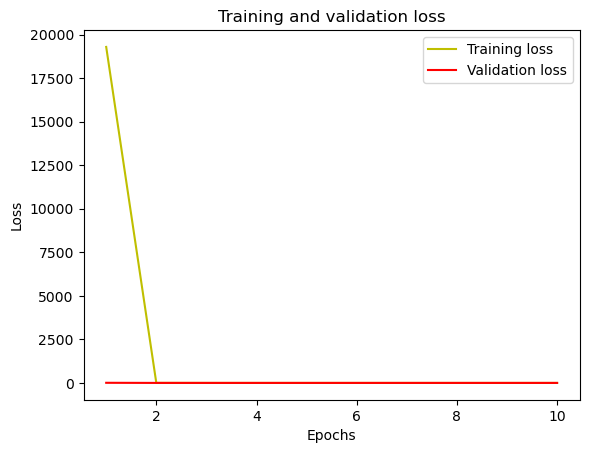

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

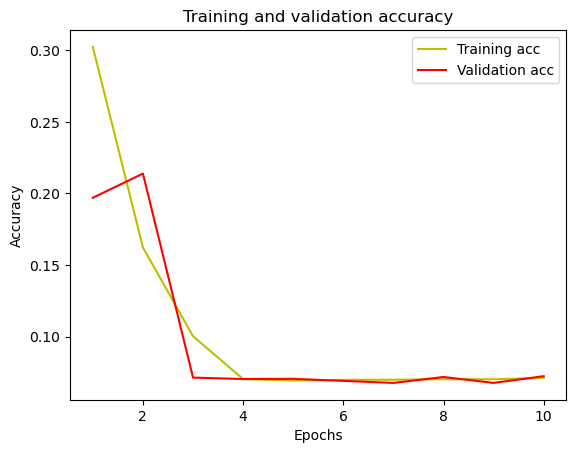

In [20]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import classification_report,confusion_matrix


y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

219/219 [==============================] - 1s 2ms/step


In [22]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       500
           1       0.00      0.00      0.00       543
           2       0.00      0.00      0.00       503
           3       0.00      0.00      0.00       467
           4       0.00      0.00      0.00       516
           5       0.00      0.00      0.00       505
           6       0.00      0.00      0.00       493
           7       0.00      0.00      0.00       515
           8       0.00      0.00      0.00       500
           9       0.00      0.00      0.00       494
          10       0.07      1.00      0.14       507
          11       0.00      0.00      0.00       475
          12       0.00      0.00      0.00       498
          13       0.00      0.00      0.00       484

    accuracy                           0.07      7000
   macro avg       0.01      0.07      0.01      7000
weighted avg       0.01      0.07      0.01      7000

[[  0   0   0   0   0   1

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
